In [1]:
import pandas as pd

# Load the CSV file
file_path = 'Computing&StatisticAnalysis_courses.csv'  # Replace with the actual path
computing_courses_df = pd.read_csv(file_path)



## NUS MODS DATA

In [2]:
computing_courses_df.head()

,Title,Description,Department,Faculty
0,Introduction to Business Analytics,This course provides students with an introduc...,Information Systems and Analytics,Computing
1,Business Analytics Immersion Programme,This course aims to equip students with a firs...,Information Systems and Analytics,Computing
2,Econometrics Modeling for Business Analytics,This course provides the foundations to econom...,Information Systems and Analytics,Computing
3,Data Management and Visualisation,This course aims to provide students with prac...,Information Systems and Analytics,Computing
4,Feature Engineering for Machine Learning,This course covers topics that are important f...,Information Systems and Analytics,Computing


In [3]:
# Check for duplicate rows
duplicates = computing_courses_df[computing_courses_df.duplicated()]

# Display duplicate rows if any
print("Duplicate rows:")
print(duplicates)

# Count of duplicate rows
print("Number of duplicate rows:", len(duplicates))


Duplicate rows:
                                                 Title  \
40                                    Independent Work   
62                             Programming Methodology   
63                             Programming Methodology   
67                             Programming Methodology   
75                                  Exchange CS Course   
80                      Data Structures and Algorithms   
84                                    Database Systems   
87                                Software Engineering   
98   Software Engineering & Object-Oriented Program...   
103                                 Exchange CS Course   
105                                 Exchange CS Course   
106                                 Exchange CS Course   
107                                 Exchange CS Course   
132                            Competitive Programming   
142                                  Computer Graphics   
163                                 Exchange CS Course  

In [4]:
# Remove duplicate rows
computing_courses_df = computing_courses_df.drop_duplicates()

# Display the number of rows after removing duplicates
print("Number of rows after removing duplicates:", len(computing_courses_df))


Number of rows after removing duplicates: 570


In [5]:
# Check distinct values and missing values for each column except 'Description'
distinct_values_info = {
    col: {
        "distinct_values": computing_courses_df[col].unique(),
        "missing_values": computing_courses_df[col].isnull().sum()
    }
    for col in computing_courses_df.columns if col != "Description" and col != "Title"
}

# Display the distinct values and missing values info for each column
import pprint
pprint.pprint(distinct_values_info)

{'Department': {'distinct_values': array(['Information Systems and Analytics', 'Computer Science',
       "SoC Dean's Office", 'Statistics and Data Science',
       'University Scholars Programme'], dtype=object),
                'missing_values': 0},
 'Faculty': {'distinct_values': array(['Computing', 'Science'], dtype=object),
             'missing_values': 0}}


In [6]:
missing_Title = computing_courses_df['Title'].isnull().sum()
empty_Title = (computing_courses_df['Title'].str.strip() == '').sum()
print("Number of missing Title:", missing_Title)
print("Number of empty Title:", empty_Title)
missing_descriptions = computing_courses_df['Description'].isnull().sum()
empty_descriptions = (computing_courses_df['Description'].str.strip() == '').sum()
print("Number of missing descriptions:", missing_descriptions)
print("Number of empty descriptions:", empty_descriptions)

Number of missing Title: 0
Number of empty Title: 0
Number of missing descriptions: 11
Number of empty descriptions: 0


In [7]:
# Remove rows with missing or empty descriptions
computing_courses_df = computing_courses_df.dropna(subset=['Description'])

# Verify the changes
print(computing_courses_df)


                                                 Title  \
0                   Introduction to Business Analytics   
1               Business Analytics Immersion Programme   
2         Econometrics Modeling for Business Analytics   
3                    Data Management and Visualisation   
4             Feature Engineering for Machine Learning   
..                                                 ...   
618  Undergraduate Teaching Opportunities Programme...   
619  Undergraduate Teaching Opportunities Programme...   
622                          Integrated Honours Thesis   
623                    Integrated Honours Dissertation   
624                         Integrated Honours Project   

                                           Description  \
0    This course provides students with an introduc...   
1    This course aims to equip students with a firs...   
2    This course provides the foundations to econom...   
3    This course aims to provide students with prac...   
4    This cou

Word Count Statistics for Description Column:
count    559.000000
mean      76.107335
std       28.037915
min        2.000000
25%       60.500000
50%       82.000000
75%       96.000000
max      209.000000
Name: Description, dtype: float64


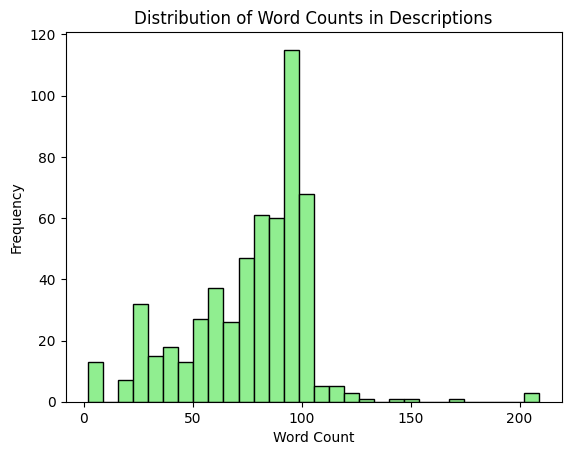

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import re
word_counts = computing_courses_df['Description'].dropna().apply(lambda x: len(x.split()))

# Display the word count statistics
word_count_stats = word_counts.describe()
print("Word Count Statistics for Description Column:")
print(word_count_stats)
word_counts = computing_courses_df['Description'].dropna().apply(lambda x: len(x.split()))
plt.hist(word_counts, bins=30, color='lightgreen', edgecolor='black')
plt.title('Distribution of Word Counts in Descriptions')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

In [9]:
computing_courses_df = computing_courses_df.rename(columns={
    'Faculty': 'Subject'
})

## Coursera data

In [10]:
file_path = 'Coursera_2.csv'  # Replace with the actual path
cousera_df = pd.read_csv(file_path)

In [11]:
cousera_df.head()

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills,Specialized
0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,4.8,https://www.coursera.org/learn/write-a-feature...,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...,Arts and Humanities
1,Business Strategy: Business Model Canvas Analy...,Coursera Project Network,Beginner,4.8,https://www.coursera.org/learn/canvas-analysis...,"By the end of this guided project, you will be...",Finance business plan persona (user experien...,Business
2,Silicon Thin Film Solar Cells,�cole Polytechnique,Advanced,4.1,https://www.coursera.org/learn/silicon-thin-fi...,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...,Physical Science and Engineering
3,Finance for Managers,IESE Business School,Intermediate,4.8,https://www.coursera.org/learn/operational-fin...,"When it comes to numbers, there is always more...",accounts receivable dupont analysis analysis...,Business
4,Retrieve Data using Single-Table SQL Queries,Coursera Project Network,Beginner,4.6,https://www.coursera.org/learn/single-table-sq...,In this course you�ll learn how to effectively...,Data Analysis select (sql) database manageme...,Information Technology


In [12]:
#remove irelevant columns
columns_to_keep = ['Course Name', 'Course Description','Specialized']

cousera_df = cousera_df[columns_to_keep].rename(columns={
    'Course Name': 'Title',
    'Course Description': 'Description',
    'Specialized': 'Subject'
})

cousera_df

,Title,Description,Subject
0,Write A Feature Length Screenplay For Film Or ...,Write a Full Length Feature Film Script In th...,Arts and Humanities
1,Business Strategy: Business Model Canvas Analy...,"By the end of this guided project, you will be...",Business
2,Silicon Thin Film Solar Cells,This course consists of a general presentation...,Physical Science and Engineering
3,Finance for Managers,"When it comes to numbers, there is always more...",Business
4,Retrieve Data using Single-Table SQL Queries,In this course you�ll learn how to effectively...,Information Technology
...,...,...,...
3517,"Capstone: Retrieving, Processing, and Visualiz...","In the capstone, students will build a series ...",Data Science
3518,Patrick Henry: Forgotten Founder,"�Give me liberty, or give me death:� Rememberi...",Arts and Humanities
3519,Business intelligence and data analytics: Gene...,�Megatrends� heavily influence today�s organis...,Business
3520,Rigid Body Dynamics,"This course teaches dynamics, one of the basic...",Physical Science and Engineering


In [ ]:
def clean_english_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove non-printable characters
    text = re.sub(r'[\x00-\x1F\x7F-\x9F]', '', text)
    
    # Keep only English letters, numbers, spaces, and common punctuation
    text = re.sub(r'[^a-z0-9\s.,;!?\'"-]', '', text)
    
    # Remove excessive punctuation sequences (e.g., "!!!" -> "!")
    text = re.sub(r'([.,;!?])\1+', r'\1', text)
    
    # Collapse multiple spaces into one
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

# Apply the function to the Description column
cousera_df['Description'] = cousera_df['Description'].apply(clean_english_text)
cousera_df

,Title,Description,Subject
0,Write A Feature Length Screenplay For Film Or ...,Write a Full Length Feature Film Script In th...,Arts and Humanities
1,Business Strategy: Business Model Canvas Analy...,"By the end of this guided project, you will be...",Business
2,Silicon Thin Film Solar Cells,This course consists of a general presentation...,Physical Science and Engineering
3,Finance for Managers,"When it comes to numbers, there is always more...",Business
4,Retrieve Data using Single-Table SQL Queries,In this course youll learn how to effectively ...,Information Technology
...,...,...,...
3517,"Capstone: Retrieving, Processing, and Visualiz...","In the capstone, students will build a series ...",Data Science
3518,Patrick Henry: Forgotten Founder,"Give me liberty, or give me death Remembering ...",Arts and Humanities
3519,Business intelligence and data analytics: Gene...,Megatrends heavily influence todays organisati...,Business
3520,Rigid Body Dynamics,"This course teaches dynamics, one of the basic...",Physical Science and Engineering


In [14]:
missing_descriptions = cousera_df['Description'].isnull().sum()
empty_descriptions = (cousera_df['Description'].str.strip() == '').sum()
print("Number of missing descriptions:", missing_descriptions)
print("Number of empty descriptions:", empty_descriptions)
missing_Title = cousera_df['Title'].isnull().sum()
empty_Title = (cousera_df['Title'].str.strip() == '').sum()
print("Number of missing Title:", missing_Title)
print("Number of empty Title:", empty_Title)

Number of missing descriptions: 0
Number of empty descriptions: 0
Number of missing Title: 0
Number of empty Title: 0


In [15]:
# Check distinct values and missing values for each column except 'Description'
distinct_values_info = {
    col: {
        "distinct_values": cousera_df[col].unique(),
        "missing_values": cousera_df[col].isnull().sum()
    }
    for col in cousera_df.columns if col != "Description" and col != "Title"
}

# Display the distinct values and missing values info for each column
import pprint
pprint.pprint(distinct_values_info)

{'Subject': {'distinct_values': array(['Arts and Humanities', 'Business',
       'Physical Science and Engineering', 'Information Technology',
       'Computer Science', 'Data Science', 'Health', nan,
       'Social Sciences', 'Language Learning', 'Personal Development',
       'Math and Logic'], dtype=object),
             'missing_values': 337}}


In [16]:
# Filter for specific subjects
cousera_df = cousera_df[cousera_df['Subject'].isin(['Information Technology', 'Computer Science', 'Data Science'])]

cousera_df


,Title,Description,Subject
4,Retrieve Data using Single-Table SQL Queries,In this course youll learn how to effectively ...,Information Technology
5,Building Test Automation Framework using Selen...,Selenium is one of the most widely used functi...,Computer Science
7,"Programming Languages, Part A",This course is an introduction to the basic co...,Computer Science
12,Hacking and Patching,"In this MOOC, you will learn how to hack web a...",Computer Science
13,Business Statistics and Analysis Capstone,The Business Statistics and Analysis Capstone ...,Data Science
...,...,...,...
3512,Mining Data to Extract and Visualize Insights ...,"By the end of this project, you will learn how...",Data Science
3515,Network Function Virtualization,This course covers Network Function Virtualiza...,Information Technology
3516,Scalable Machine Learning on Big Data using Ap...,This course will empower you with the skills t...,Data Science
3517,"Capstone: Retrieving, Processing, and Visualiz...","In the capstone, students will build a series ...",Data Science


## EDX Data

In [17]:
file_path = 'edx_courses.csv'  # Replace with the actual path
edx_df = pd.read_csv(file_path)

In [18]:
edx_df = edx_df[edx_df['language'].isin(['English'])]

edx_df

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
0,How to Learn Online,Learn essential strategies for successful onli...,"124,980",Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,FREE-Add a Verified Certificate for $49 USD,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...,https://www.edx.org/course/how-to-learn-online
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...","293,864",Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7 Weeks,FREE-Add a Verified Certificate for $49 USD,This course aims to teach everyone the basics ...,NaN,https://www.edx.org/course/programming-for-eve...
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,"2,442,271",Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12 Weeks,FREE-Add a Verified Certificate for $90 USD,"This is CS50x , Harvard University's introduct...",NaN,https://www.edx.org/course/cs50s-introduction-...
3,The Analytics Edge,"Through inspiring examples and stories, discov...","129,555",Instructor-led on a course schedule,Massachusetts Institute of Technology,Dimitris Bertsimas-Allison O'Hair-John Silberh...,Intermediate,Data Analysis & Statistics,English,English,10–15 hours per week,13 Weeks,FREE-Add a Verified Certificate for $199 USD,"In the last decade, the amount of data availab...",NaN,https://www.edx.org/course/the-analytics-edge
4,Marketing Analytics: Marketing Measurement Str...,This course is part of a MicroMasters® Program,"81,140",Self-paced on your time,"University of California, Berkeley",Stephan Sorger,Introductory,Computer Science,English,English,5–7 hours per week,4 Weeks,FREE-Add a Verified Certificate for $249 USD,Begin your journey in a new career in marketin...,NaN,https://www.edx.org/course/marketing-analytics...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969,Global China: From the Mongols to the Ming,Explore the impact of the conquest dynasties a...,"41,902",Self-paced on your time,Harvard University,Peter K. Bol-William C. Kirby,Introductory,History,English,"English, 中文",1–3 hours per week,15 Weeks,FREE-Add a Verified Certificate for $139 USD,"In the 13th century, by force of arms, the Mon...",NaN,https://www.edx.org/course/global-china-from-t...
970,Leaders in Citizen Security and Justice Manage...,"Learn about the latest in prevention, police a...",NaN,Self-paced on your time,Inter-American Development Bank,Olga Espinoza-Eduardo Pazinato-Alejandra Mera-...,Intermediate,Social Sciences,English,English,4–5 hours per week,10 Weeks,FREE-Add a Verified Certificate for $25 USD,The high rates of crime and violence are two o...,NaN,https://www.edx.org/course/leaders-in-citizen-...
972,Computational Neuroscience: Neuronal Dynamics ...,This course explains the mathematical and comp...,"11,246",Self-paced on your time,École polytechnique fédérale de Lausanne,Wulfram Gerstner,Advanced,Biology & Life Sciences,English,English,4–6 hours per week,6 Weeks,FREE-Add a Verified Certificate for $139 USD,What happens in your brain when you make a dec...,Textbook: Neuronal Dynamics - from single neur...,https://www.edx.org/course/computational-neuro...
973,Cities and the Challenge of Sustainable Develo...,What is a sustainable city? Learn the basics h...,"8,775",Self-paced on your time,SDG Academy,Jeffrey D. Sachs,Introductory,Environmental Studies,English,English,1–2 hours per week,1 Weeks,FREE-Add a Verified Certificate for $25 USD,"According to the United Nations, urbanization ...",Module 1: Introduction to t

In [19]:
#remove irelevant columns
columns_to_keep = ['title', 'course_description','subject']

edx_df = edx_df[columns_to_keep].rename(columns={
    'title': 'Title',
    'course_description': 'Description',
    'subject': 'Subject'
})

edx_df

,Title,Description,Subject
0,How to Learn Online,"Designed for those who are new to elearning, t...",Education & Teacher Training
1,Programming for Everybody (Getting Started wit...,This course aims to teach everyone the basics ...,Computer Science
2,CS50's Introduction to Computer Science,"This is CS50x , Harvard University's introduct...",Computer Science
3,The Analytics Edge,"In the last decade, the amount of data availab...",Data Analysis & Statistics
4,Marketing Analytics: Marketing Measurement Str...,Begin your journey in a new career in marketin...,Computer Science
...,...,...,...
969,Global China: From the Mongols to the Ming,"In the 13th century, by force of arms, the Mon...",History
970,Leaders in Citizen Security and Justice Manage...,The high rates of crime and violence are two o...,Social Sciences
972,Computational Neuroscience: Neuronal Dynamics ...,What happens in your brain when you make a dec...,Biology & Life Sciences
973,Cities and the Challenge of Sustainable Develo...,"According to the United Nations, urbanization ...",Environmental Studies


In [20]:
missing_descriptions = edx_df['Description'].isnull().sum()
empty_descriptions = (edx_df['Description'].str.strip() == '').sum()
print("Number of missing descriptions:", missing_descriptions)
print("Number of empty descriptions:", empty_descriptions)
missing_Title = edx_df['Title'].isnull().sum()
empty_Title = (edx_df['Title'].str.strip() == '').sum()
print("Number of missing Title:", missing_Title)
print("Number of empty Title:", empty_Title)

Number of missing descriptions: 26
Number of empty descriptions: 0
Number of missing Title: 0
Number of empty Title: 0


In [21]:
# Keep only rows where 'Description' is a string
edx_df = edx_df[edx_df['Description'].apply(lambda x: isinstance(x, str))]

# Now you can proceed with any further cleaning
edx_df['Description'] = edx_df['Description'].apply(clean_english_text)
edx_df

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_28536\3878717723.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edx_df['Description'] = edx_df['Description'].apply(clean_english_text)


,Title,Description,Subject
0,How to Learn Online,"Designed for those who are new to elearning, t...",Education & Teacher Training
1,Programming for Everybody (Getting Started wit...,This course aims to teach everyone the basics ...,Computer Science
2,CS50's Introduction to Computer Science,"This is CS50x , Harvard University's introduct...",Computer Science
3,The Analytics Edge,"In the last decade, the amount of data availab...",Data Analysis & Statistics
4,Marketing Analytics: Marketing Measurement Str...,Begin your journey in a new career in marketin...,Computer Science
...,...,...,...
969,Global China: From the Mongols to the Ming,"In the 13th century, by force of arms, the Mon...",History
970,Leaders in Citizen Security and Justice Manage...,The high rates of crime and violence are two o...,Social Sciences
972,Computational Neuroscience: Neuronal Dynamics ...,What happens in your brain when you make a dec...,Biology & Life Sciences
973,Cities and the Challenge of Sustainable Develo...,"According to the United Nations, urbanization ...",Environmental Studies


In [22]:
# Check for duplicate rows
duplicates = edx_df[edx_df.duplicated()]

# Display duplicate rows if any
print("Duplicate rows:")
print(duplicates)

# Count of duplicate rows
print("Number of duplicate rows:", len(duplicates))

Duplicate rows:
                          Title  \
95  Introduction to Probability   

                                          Description  \
95  Probability and statistics help to bring logic...   

                       Subject  
95  Data Analysis & Statistics  
Number of duplicate rows: 1


In [23]:
# Remove duplicate rows
edx_df = edx_df.drop_duplicates()

# Display the number of rows after removing duplicates
print("Number of rows after removing duplicates:", len(edx_df))

Number of rows after removing duplicates: 750


In [24]:
# Check distinct values and missing values for each column except 'Description'
distinct_values_info = {
    col: {
        "distinct_values": edx_df[col].unique(),
        "missing_values": edx_df[col].isnull().sum()
    }
    for col in edx_df.columns if col != "Description" and col != "Title"
}

# Display the distinct values and missing values info for each column
import pprint
pprint.pprint(distinct_values_info)

{'Subject': {'distinct_values': array(['Education & Teacher Training', 'Computer Science',
       'Data Analysis & Statistics', 'Business & Management',
       'Communication', 'Health & Safety', 'Math', 'Humanities', 'Ethics',
       'Economics & Finance', 'Food & Nutrition',
       'Biology & Life Sciences', 'Social Sciences', 'Architecture',
       'Medicine', 'Environmental Studies', 'Chemistry', 'Art & Culture',
       'Language', 'Engineering', 'Philosophy & Ethics', 'Electronics',
       'History', 'Literature', 'Physics', 'Law', 'Design', 'Science',
       'Music', 'Energy & Earth Sciences', 'Philanthropy'], dtype=object),
             'missing_values': 0}}


In [25]:
# Filter for specific subjects
edx_df = edx_df[edx_df['Subject'].isin(['Computer Science', 'Data Analysis & Statistics'])]

edx_df


,Title,Description,Subject
1,Programming for Everybody (Getting Started wit...,This course aims to teach everyone the basics ...,Computer Science
2,CS50's Introduction to Computer Science,"This is CS50x , Harvard University's introduct...",Computer Science
3,The Analytics Edge,"In the last decade, the amount of data availab...",Data Analysis & Statistics
4,Marketing Analytics: Marketing Measurement Str...,Begin your journey in a new career in marketin...,Computer Science
16,Data Science: R Basics,The first in our Professional Certificate Prog...,Data Analysis & Statistics
...,...,...,...
943,Introduction to Hyperledger Sovereign Identity...,"To the surprise of absolutely no one, trust is...",Computer Science
952,A System View of Communications: From Signals ...,Have you ever wondered how information is tran...,Computer Science
962,Scripting and Programming Foundations,Computer programs are abundant in many people'...,Computer Science
963,Using GPUs to Scale and Speed-up Deep Learning,Training acomplex deep learning model with a v...,Data Analysis & Statistics


## Merge

In [26]:
# Drop the 'Department' column
computing_courses_df = computing_courses_df.drop(columns=['Department'])

# Verify the changes
computing_courses_df


,Title,Description,Subject
0,Introduction to Business Analytics,This course provides students with an introduc...,Computing
1,Business Analytics Immersion Programme,This course aims to equip students with a firs...,Computing
2,Econometrics Modeling for Business Analytics,This course provides the foundations to econom...,Computing
3,Data Management and Visualisation,This course aims to provide students with prac...,Computing
4,Feature Engineering for Machine Learning,This course covers topics that are important f...,Computing
...,...,...,...
618,Undergraduate Teaching Opportunities Programme...,UTOP aims to train undergraduates to acquire a...,Computing
619,Undergraduate Teaching Opportunities Programme...,UTOP aims to train undergraduates to acquire a...,Science
622,Integrated Honours Thesis,The objective of this course is to enable stud...,Computing
623,Integrated Honours Dissertation,The objective of this course is to enable stud...,Computing


In [27]:
cousera_df

,Title,Description,Subject
4,Retrieve Data using Single-Table SQL Queries,In this course youll learn how to effectively ...,Information Technology
5,Building Test Automation Framework using Selen...,Selenium is one of the most widely used functi...,Computer Science
7,"Programming Languages, Part A",This course is an introduction to the basic co...,Computer Science
12,Hacking and Patching,"In this MOOC, you will learn how to hack web a...",Computer Science
13,Business Statistics and Analysis Capstone,The Business Statistics and Analysis Capstone ...,Data Science
...,...,...,...
3512,Mining Data to Extract and Visualize Insights ...,"By the end of this project, you will learn how...",Data Science
3515,Network Function Virtualization,This course covers Network Function Virtualiza...,Information Technology
3516,Scalable Machine Learning on Big Data using Ap...,This course will empower you with the skills t...,Data Science
3517,"Capstone: Retrieving, Processing, and Visualiz...","In the capstone, students will build a series ...",Data Science


In [28]:
edx_df

,Title,Description,Subject
1,Programming for Everybody (Getting Started wit...,This course aims to teach everyone the basics ...,Computer Science
2,CS50's Introduction to Computer Science,"This is CS50x , Harvard University's introduct...",Computer Science
3,The Analytics Edge,"In the last decade, the amount of data availab...",Data Analysis & Statistics
4,Marketing Analytics: Marketing Measurement Str...,Begin your journey in a new career in marketin...,Computer Science
16,Data Science: R Basics,The first in our Professional Certificate Prog...,Data Analysis & Statistics
...,...,...,...
943,Introduction to Hyperledger Sovereign Identity...,"To the surprise of absolutely no one, trust is...",Computer Science
952,A System View of Communications: From Signals ...,Have you ever wondered how information is tran...,Computer Science
962,Scripting and Programming Foundations,Computer programs are abundant in many people'...,Computer Science
963,Using GPUs to Scale and Speed-up Deep Learning,Training acomplex deep learning model with a v...,Data Analysis & Statistics


In [29]:
combined_df = pd.concat([computing_courses_df, cousera_df, edx_df], ignore_index=True)

# Verify the combined DataFrame
combined_df


,Title,Description,Subject
0,Introduction to Business Analytics,This course provides students with an introduc...,Computing
1,Business Analytics Immersion Programme,This course aims to equip students with a firs...,Computing
2,Econometrics Modeling for Business Analytics,This course provides the foundations to econom...,Computing
3,Data Management and Visualisation,This course aims to provide students with prac...,Computing
4,Feature Engineering for Machine Learning,This course covers topics that are important f...,Computing
...,...,...,...
1911,Introduction to Hyperledger Sovereign Identity...,"To the surprise of absolutely no one, trust is...",Computer Science
1912,A System View of Communications: From Signals ...,Have you ever wondered how information is tran...,Computer Science
1913,Scripting and Programming Foundations,Computer programs are abundant in many people'...,Computer Science
1914,Using GPUs to Scale and Speed-up Deep Learning,Training acomplex deep learning model with a v...,Data Analysis & Statistics


In [33]:
# Replace values in the 'Subject' column
combined_df['Subject'] = combined_df['Subject'].replace({
    'Computing': 'Computer Science',
    'Data Analysis & Statistics': 'Data Science'
})


In [34]:
# Check distinct values and missing values for each column except 'Description'
distinct_values_info = {
    col: {
        "distinct_values": combined_df[col].unique(),
        "missing_values": combined_df[col].isnull().sum()
    }
    for col in combined_df.columns if col != "Description" and col != "Title"
}

# Display the distinct values and missing values info for each column
import pprint
pprint.pprint(distinct_values_info)

{'Subject': {'distinct_values': array(['Computer Science', 'Science', 'Information Technology',
       'Data Science'], dtype=object),
             'missing_values': 0}}


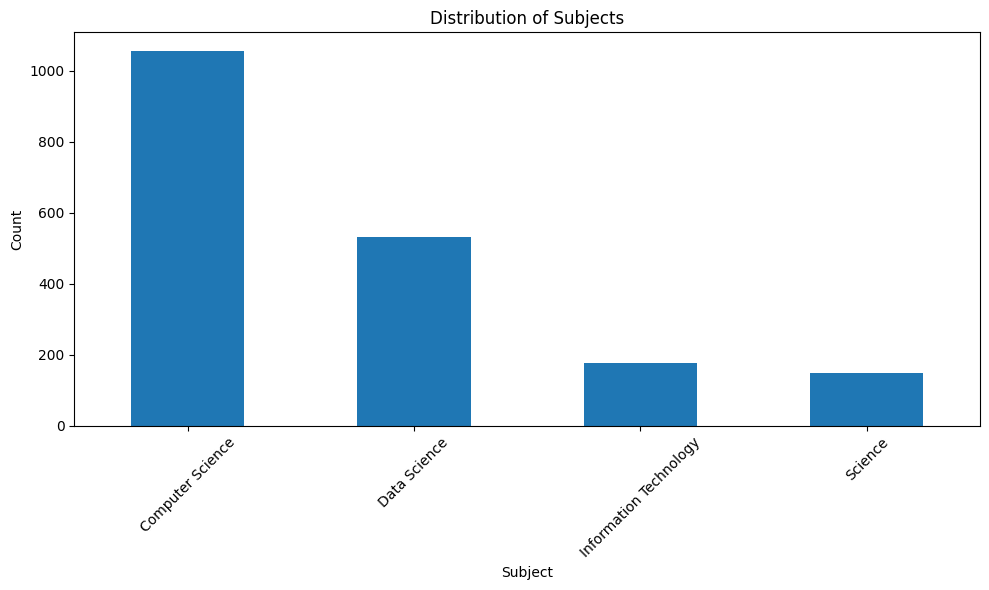

In [38]:
subject_distribution = combined_df['Subject'].value_counts()

# Plotting the distribution of subjects as a bar plot
plt.figure(figsize=(10, 6))
subject_distribution.plot(kind='bar')
plt.title('Distribution of Subjects')
plt.xlabel('Subject')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [35]:
combined_df.to_csv('Combined_course_data.csv', index=False)

In [36]:
combined_df

,Title,Description,Subject
0,Introduction to Business Analytics,This course provides students with an introduc...,Computer Science
1,Business Analytics Immersion Programme,This course aims to equip students with a firs...,Computer Science
2,Econometrics Modeling for Business Analytics,This course provides the foundations to econom...,Computer Science
3,Data Management and Visualisation,This course aims to provide students with prac...,Computer Science
4,Feature Engineering for Machine Learning,This course covers topics that are important f...,Computer Science
...,...,...,...
1911,Introduction to Hyperledger Sovereign Identity...,"To the surprise of absolutely no one, trust is...",Computer Science
1912,A System View of Communications: From Signals ...,Have you ever wondered how information is tran...,Computer Science
1913,Scripting and Programming Foundations,Computer programs are abundant in many people'...,Computer Science
1914,Using GPUs to Scale and Speed-up Deep Learning,Training acomplex deep learning model with a v...,Data Science
